<a href="https://colab.research.google.com/github/kenhuangsy/General-Deep-Learning/blob/main/Computer_Vision_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Why do we perform Image Augmentation?

Image augmentation allows us to transform an image so that we can have more data on an object. For example, if we have an image of a dog. We can rotate the image of the dog upside down and it is still an image of a dog. We can also make the image black and white and it is still an image of a dog. This is the main idea behind image augmentation.

## Image Augmentation Methods

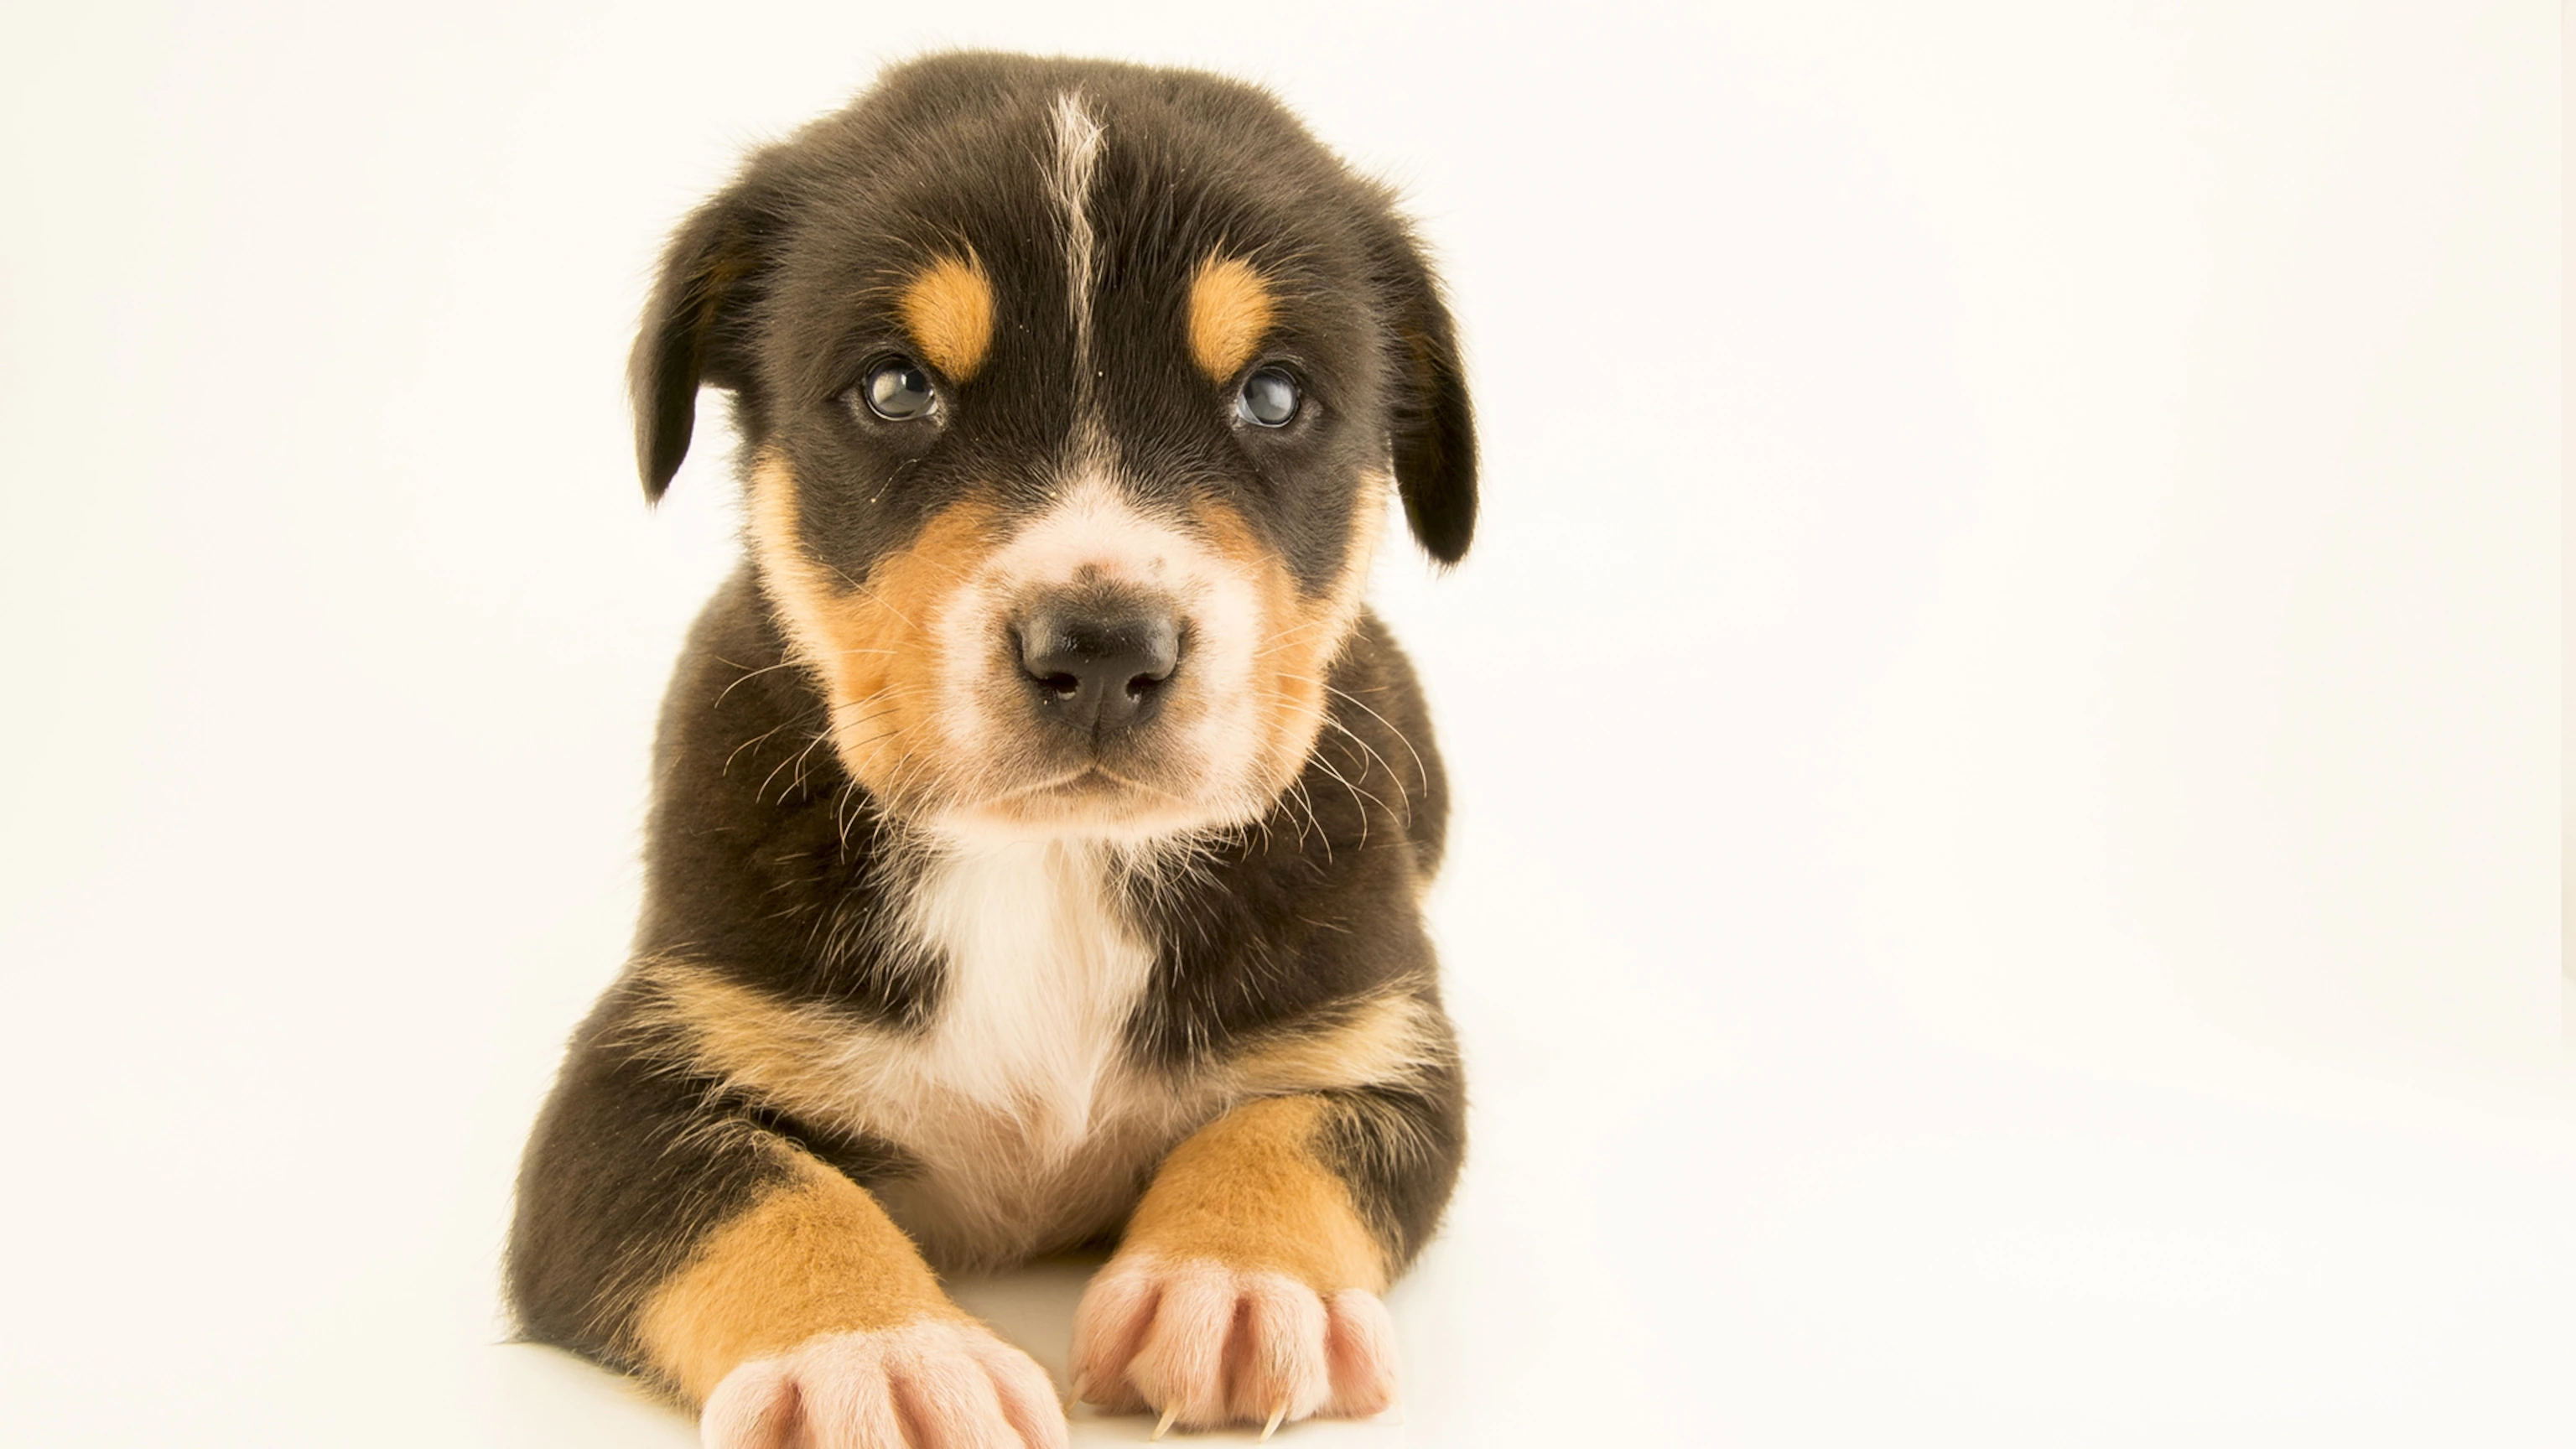

In [ ]:
from PIL import Image
dog = Image.open('image_dog_colab.webp')
dog

Let's create a function that takes in an image, the type of augmentation, and the number of times we want to augment this image

In [ ]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

transform = ToTensor()

def apply_augmentation(img, aug, num_rows=2, num_cols=4, size = 15):
    """
    Applies a specified augmentation to an image multiple times and displays the results in a grid.
    
    Parameters:
        img (torch.Tensor): The image to be augmented
        aug (callable): The augmentation to be applied to the image
        num_rows (int): The number of rows in the grid of images
        num_cols (int): The number of columns in the grid of images
        scale (float): Scaling factor for the size of the output images
        
    Returns:
        None
    """
    img = transform(img) # convert PIL image into tensors
    Y = [aug(img) for _ in range(num_rows * num_cols)] # create num_rows by num_cols number of augmented versions of the image
    grid = make_grid(Y, nrow=num_cols) #we want num_cols images per row which is specified by nrow (tells us images per row)
    plt.figure(figsize=(size, size))
    plt.imshow(grid.permute(1, 2, 0))
    plt.show()

### Flipping

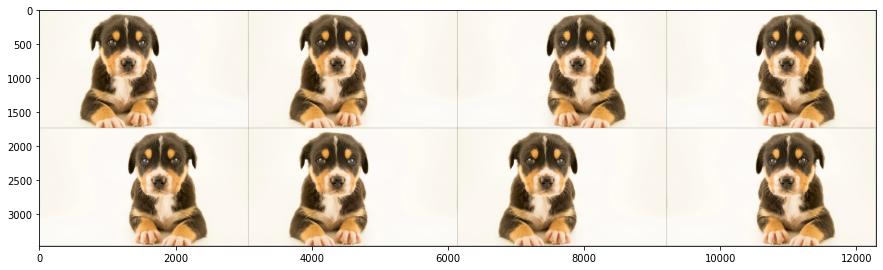

In [ ]:
apply_augmentation(dog, transforms.RandomHorizontalFlip())

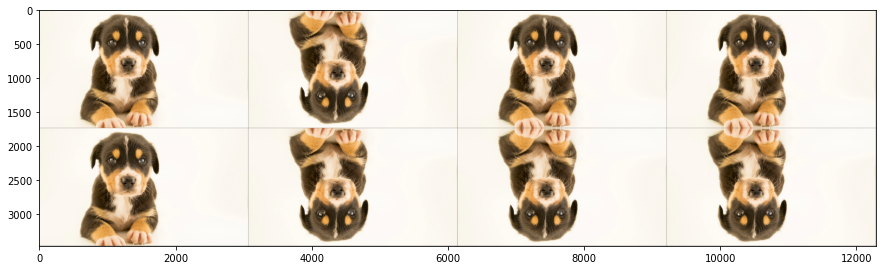

In [ ]:
apply_augmentation(dog, transforms.RandomVerticalFlip())

### Cropping

Notice that all of these images are around the same position? How can we augment the image so that the dog appears in different places? This is important because we can lower the sensitivity of a model to a specific position, which means that it is less reliant on position to classify the image. 

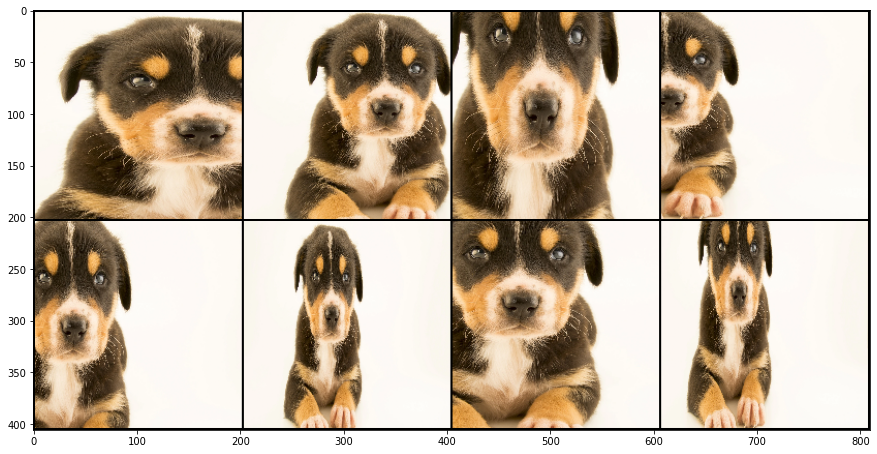

In [ ]:
augmentation_shape =  transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
#200 x 200 output image
#scale: scale between 10% and 100% of its original size
#ratio: aspect ratios between 0.5 and 2
apply_augmentation(dog, augmentation_shape)

### Changing the colors

Remember how we talked about a black and white image of a dog is still a dog? Well this is where changing colors comes in.

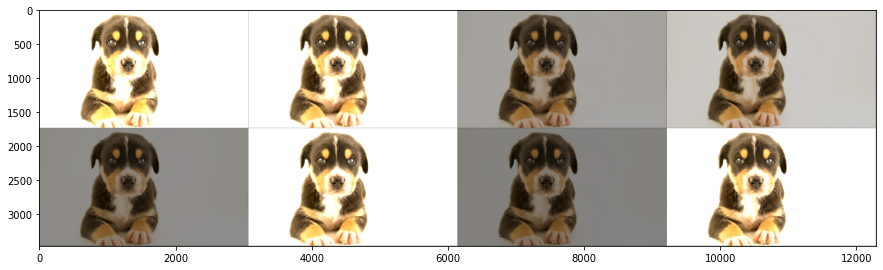

In [ ]:
apply_augmentation(dog, transforms.ColorJitter(
    brightness = 0.5, contrast = 0, saturation = 0, hue = 0
))

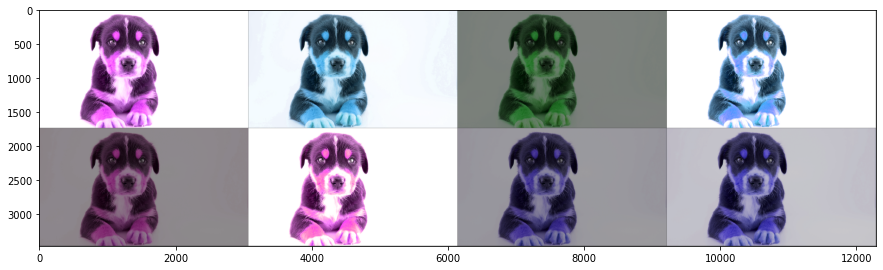

In [ ]:
apply_augmentation(dog, transforms.ColorJitter(
    brightness = 0.5, contrast = 0, saturation = 0, hue = 0.5
))

In [ ]:
# We can also save an instance of this RandomColorJitter
color_augmentation = transforms.ColorJitter(
    brightness = 0.5, contrast = 0, saturation = 0, hue = 0.5
)

### How can we apply all the methods together?

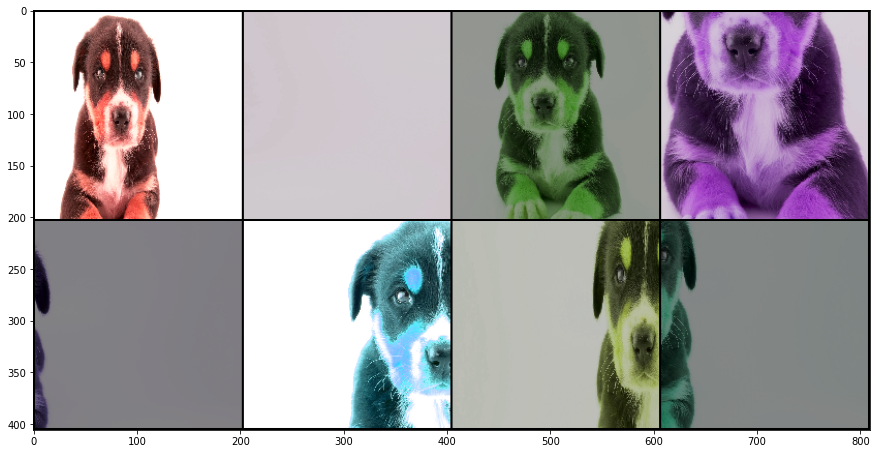

In [ ]:
all_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(), color_augmentation, augmentation_shape
])
apply_augmentation(dog, all_augmentation)

## Summary
Image augmentation involves creating new, randomized images based on existing training data to enhance the ability of models to generalize. This technique is typically only applied to training examples, not during prediction, in order to produce accurate results. Additionally, various image augmentation methods can be implemented simultaneously using deep learning frameworks.